<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/STA410FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposal:
## Variational Inference for Large-Scale Bayesian Models

### Objective:
This project will explore variational inference (VI) as a scalable alternative to Markov Chain Monte Carlo (MCMC) for fitting Bayesian models. The focus will be on implementing VI for Bayesian regression and comparing its performance to traditional MCMC methods.

### Why This Project?

MCMC can be computationally expensive for high-dimensional models, making VI a valuable alternative.
VI is widely used in machine learning applications, such as deep generative models.
Offers insights into trade-offs between accuracy, speed, and interpretability in Bayesian modeling.
Methods & Implementation:

Implement Bayesian linear regression using both MCMC (e.g., Hamiltonian Monte Carlo) and VI.
Use PyMC or TensorFlow Probability for variational inference.
Compare convergence speed, model fit, and uncertainty quantification.
Extend to more complex models (e.g., Bayesian logistic regression) if time permits

Output()

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1655: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1655: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(



Model: Bayesian Linear Regression
WAIC: -133.38 ± 6.75
LOO: -133.42 ± 6.76

Model: Bayesian Ridge Regression
WAIC: -133.30 ± 6.71
LOO: -133.34 ± 6.72


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1655: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(



Model: Bayesian Robust Regression
WAIC: -133.51 ± 6.79
LOO: -133.54 ± 6.80


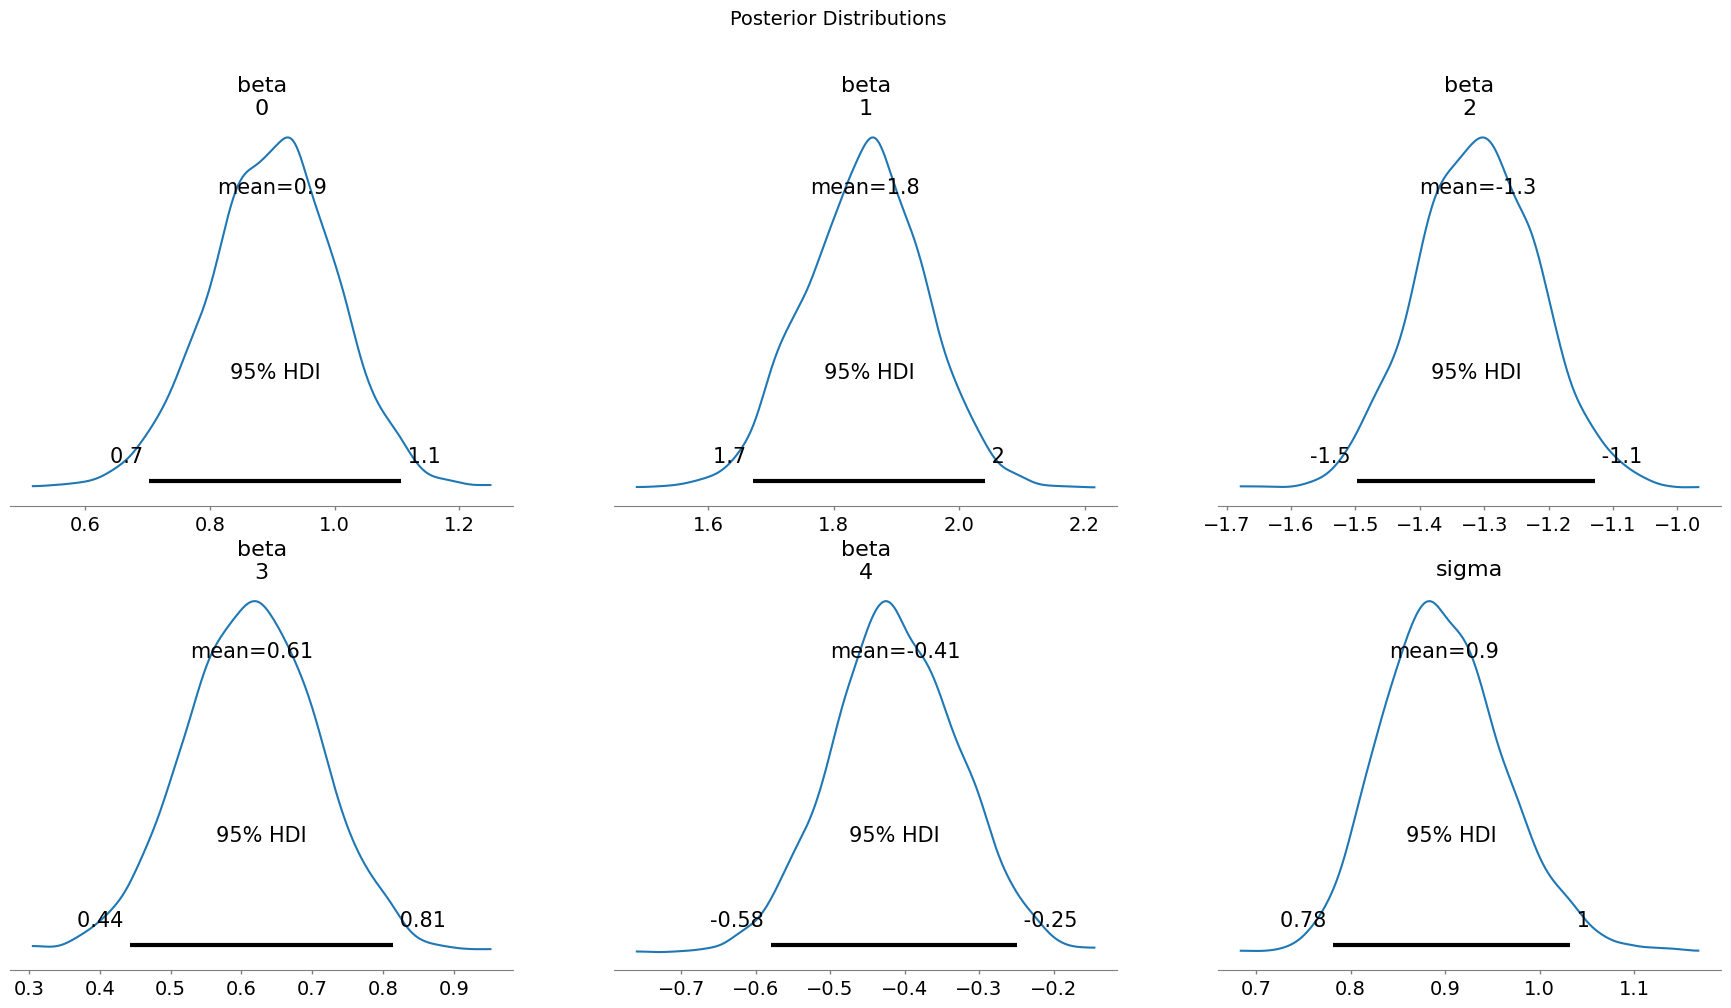

In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

def bayesian_regression_mcmc(X, y):
    with pm.Model() as model:
        # Priors
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])
        sigma = pm.HalfCauchy("sigma", beta=2)

        # Likelihood
        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

        # Sample from the posterior using MCMC (FIX: include idata_kwargs)
        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})  # Ensure log likelihood is stored

    return model, trace

def bayesian_ridge_regression(X, y):
    with pm.Model() as model:
        beta = pm.Normal("beta", mu=0, sigma=1, shape=X.shape[1])
        sigma = pm.HalfCauchy("sigma", beta=2)

        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})

    return model, trace

def bayesian_robust_regression(X, y):
    with pm.Model() as model:
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])
        sigma = pm.HalfCauchy("sigma", beta=2)
        nu = pm.Exponential("nu", 1/30)

        mu = pm.math.dot(X, beta)
        y_obs = pm.StudentT("y_obs", nu=nu, mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})

    return model, trace

def compare_models(models_traces, models_names):
    for trace, model_name in zip(models_traces, models_names):
        waic = az.waic(trace)
        loo = az.loo(trace)

        print(f"\nModel: {model_name}")
        print(f"WAIC: {waic.elpd_waic:.2f} ± {waic.se:.2f}")  # Correct attribute
        print(f"LOO: {loo.elpd_loo:.2f} ± {loo.se:.2f}")  # Correct attribute


def plot_results(trace):
    az.plot_posterior(trace, var_names=["beta", "sigma"], hdi_prob=0.95)
    plt.suptitle("Posterior Distributions", fontsize=14)
    plt.show()

# Generate example data
np.random.seed(42)
X = np.random.randn(100, 5)
true_beta = np.random.randn(5)
y = np.dot(X, true_beta) + np.random.randn(100)

# Run Bayesian models
model_mcmc, trace_mcmc = bayesian_regression_mcmc(X, y)
model_ridge, trace_ridge = bayesian_ridge_regression(X, y)
model_robust, trace_robust = bayesian_robust_regression(X, y)

# Compare models
compare_models([trace_mcmc, trace_ridge, trace_robust],
               ["Bayesian Linear Regression", "Bayesian Ridge Regression", "Bayesian Robust Regression"])

# Plot results
plot_results(trace_mcmc)


